# Rakamin Data Scientist Project-Based Internship Program
## Name: Muhammad Ridlo
## Project: Daily Sales Prediction and Clustering


## Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Downloading Data

In [ ]:
import os

In [ ]:
data_customer = pd.read_csv('/content/gdrive/MyDrive/rakamin/Case Study - Customer.csv',sep=';')
data_product = pd.read_csv('/content/gdrive/MyDrive/rakamin/Case Study - Product.csv',sep=';')
data_store = pd.read_csv('/content/gdrive/MyDrive/rakamin/Case Study - Store.csv',sep=';')
data_transaction = pd.read_csv('/content/gdrive/MyDrive/rakamin/Case Study - Transaction.csv',sep=';')
# for file in os.listdir(data):
#   print(file)

In [ ]:
data_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


## Planning - Exploring General Information of Data

In [ ]:
data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [ ]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [ ]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


## Data Cleansing

Perhatikan bahwa data customer memiliki nilai kosong. Dengan begitu, kita dapat isi dengan status marital terbanyak sesuai dengan usianya, yaitu dnegan menggunakan modus

In [ ]:
data_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
data_customer['Marital Status'].loc[data_customer['Marital Status'].isna()==True] = [data_customer['Marital Status'].loc[data_customer.Age==i].mode()[0] for i in data_customer['Age'].loc[data_customer['Marital Status'].isna()==True]]

<ipython-input-11-526e56a1c6d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_customer['Marital Status'].loc[data_customer['Marital Status'].isna()==True] = [data_customer['Marital Status'].loc[data_customer.Age==i].mode()[0] for i in data_customer['Age'].loc[data_customer['Marital Status'].isna()==True]]


In [ ]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


## EDA

In [ ]:
data_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


###### Drop kolom transactionID.

In [ ]:
data_transaction = data_transaction.drop('TransactionID',axis=1)

###### Cek kolom CustomerID, lakukan merge untuk menyatukan informasi pembeli dengan produk yang dibeli.

In [ ]:
data_transaction['CustomerID'].max()

447

In [ ]:
data_customer['CustomerID'].max()

447

In [ ]:
data_merge = pd.merge(data_transaction,data_customer,on='CustomerID',how='left')

###### Cek kolom price.

In [ ]:
data_merge.head()

,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53"
1,165,01/01/2022,P9,10000,7,70000,1,44,1,Married,"14,58"
2,183,01/01/2022,P1,8800,4,35200,4,27,1,Single,"0,18"
3,160,01/01/2022,P1,8800,7,61600,4,48,1,Married,"12,57"
4,386,01/01/2022,P9,10000,1,10000,4,33,0,Married,"6,95"


In [ ]:
data_merge.Price.unique()

array([ 7500, 10000,  8800, 15000, 16000,  4200,  9400, 12000,  3200,
       18000])

In [ ]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      5020 non-null   int64 
 1   Date            5020 non-null   object
 2   ProductID       5020 non-null   object
 3   Price           5020 non-null   int64 
 4   Qty             5020 non-null   int64 
 5   TotalAmount     5020 non-null   int64 
 6   StoreID         5020 non-null   int64 
 7   Age             5020 non-null   int64 
 8   Gender          5020 non-null   int64 
 9   Marital Status  5020 non-null   object
 10  Income          5020 non-null   object
dtypes: int64(7), object(4)
memory usage: 470.6+ KB


Terlihat bahwa price sudah sesuai dengan unique element pada data Product, sehingga tidak perlu perubahan.

###### Cek kolom marital status, ubah menjadi label encoding 0 dan 1.

In [ ]:
data_merge['Marital Status'] = [1 if i=='Married' else 0 for i in data_merge['Marital Status']]

In [ ]:
data_merge.head()

,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,328,01/01/2022,P3,7500,4,30000,12,36,0,1,"10,53"
1,165,01/01/2022,P9,10000,7,70000,1,44,1,1,"14,58"
2,183,01/01/2022,P1,8800,4,35200,4,27,1,0,"0,18"
3,160,01/01/2022,P1,8800,7,61600,4,48,1,1,"12,57"
4,386,01/01/2022,P9,10000,1,10000,4,33,0,1,"6,95"


###### Ubah tipe data Income dari string menjadi float

In [ ]:
data_merge.Income = ['.'.join(data_merge.Income[i].split(',')) for i in range(data_merge.shape[0])]

In [ ]:
data_merge.Income = data_merge.Income.astype('float')

###### Eksplor

Heatmap korelasi antarvariabel

<Axes: >

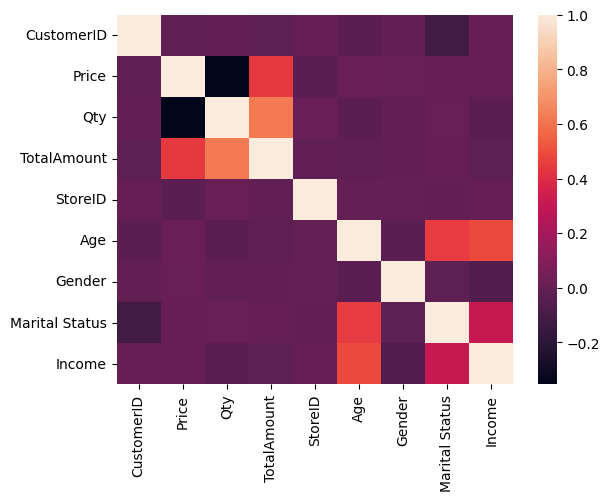

In [ ]:
sns.heatmap(data_merge.drop(['Date','ProductID'],axis=1).corr())

## ARIMA

Untuk persiapan arima, digunakan variabel Qty yang di-sum selama 1 tahun untuk menghasilkan data sales setiap harinya dalam 1 tahun.

In [ ]:
data_arima = list(data_merge.groupby('Date')['Qty'].sum().values)

In [ ]:
data_arima = pd.DataFrame({
    'date':data_merge.Date.unique(),
    'sales':data_arima
})

In [ ]:
data_arima.head()

,date,sales
0,01/01/2022,49
1,02/01/2022,50
2,03/01/2022,76
3,04/01/2022,98
4,05/01/2022,67


<Axes: >

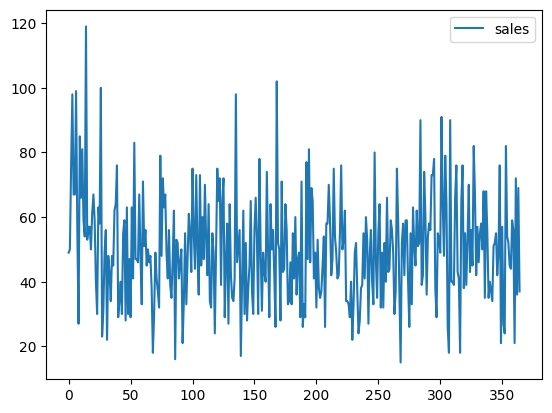

In [ ]:
data_arima.plot(kind='line')

Meninjau dari https://towardsdatascience.com/multi-step-time-series-forecasting-with-arima-lightgbm-and-prophet-cc9e3f95dfb0 kita perlu mencari grafik autokorelasi terlebih dahulu untuk meninjau sifat nonstationary dari grafik tersebut.

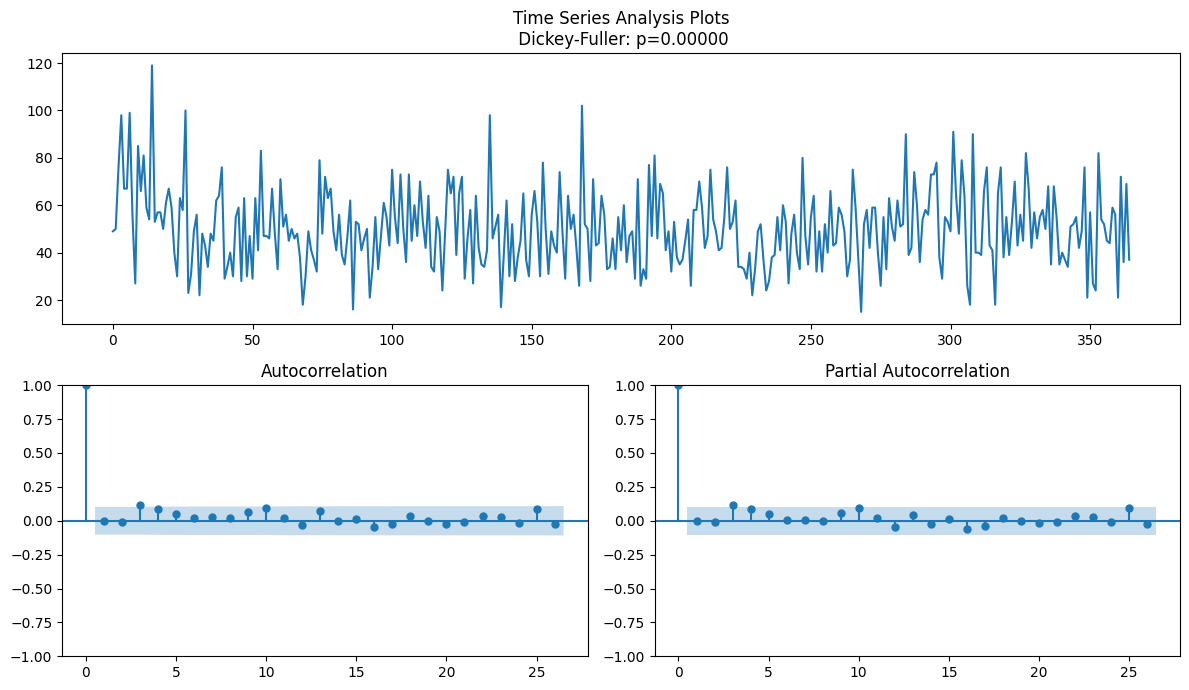

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

# adapted from https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python?scriptVersionId=50985180&cellId=80
def tsplot(y, lags=None, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

tsplot(data_arima.sales.values)

Kemudian, pemodelan ditampilkan sebagai berikut.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(data_arima.sales)

(-19.09810117481214,
 0.0,
 0,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 2906.1962501303624)

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data_arima[:300]
test = data_arima[300:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  train_size = int(len(X) * 0.66)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(data_arima.sales.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=16.210
ARIMA(0, 0, 1) RMSE=16.262
ARIMA(0, 0, 2) RMSE=16.332
ARIMA(0, 1, 0) RMSE=24.020
ARIMA(0, 1, 1) RMSE=16.521
ARIMA(0, 1, 2) RMSE=16.500
ARIMA(0, 2, 0) RMSE=40.954
ARIMA(0, 2, 1) RMSE=24.061
ARIMA(0, 2, 2) RMSE=16.718
ARIMA(1, 0, 0) RMSE=16.266
ARIMA(1, 0, 1) RMSE=16.259
ARIMA(1, 0, 2) RMSE=16.414
ARIMA(1, 1, 0) RMSE=21.353
ARIMA(1, 1, 1) RMSE=16.508
ARIMA(1, 1, 2) RMSE=16.512
ARIMA(1, 2, 0) RMSE=32.625
ARIMA(1, 2, 1) RMSE=21.388
ARIMA(1, 2, 2) RMSE=16.685
ARIMA(2, 0, 0) RMSE=16.365
ARIMA(2, 0, 1) RMSE=16.415
ARIMA(2, 0, 2) RMSE=16.598
ARIMA(2, 1, 0) RMSE=19.157
ARIMA(2, 1, 1) RMSE=16.365
ARIMA(2, 1, 2) RMSE=16.366
ARIMA(2, 2, 0) RMSE=27.244
ARIMA(2, 2, 1) RMSE=19.189
ARIMA(2, 2, 2) RMSE=16.527
ARIMA(4, 0, 0) RMSE=16.431
ARIMA(4, 0, 1) RMSE=16.364
ARIMA(4, 0, 2) RMSE=16.399
ARIMA(4, 1, 0) RMSE=17.641
ARIMA(4, 1, 1) RMSE=16.521
ARIMA(4, 1, 2) RMSE=16.508
ARIMA(4, 2, 0) RMSE=22.546
ARIMA(4, 2, 1) RMSE=17.680
ARIMA(4, 2, 2) RMSE=18.256
ARIMA(6, 0, 0) RMSE=16.417
A

In [61]:
train_size = int(len(data_arima.sales.values) * 0.66)
train, test = data_arima.sales.values[0:train_size], data_arima.sales.values[train_size:]
history = [x for x in train]
# make predictions
predictions = list()
for t in range(len(test)):
  model = ARIMA(history, order=[10,0,0])
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  history.append(test[t])
# calculate out of sample error
rmse = sqrt(mean_squared_error(test, predictions))

In [62]:
print(rmse)

16.260037455604802


In [63]:
predictions

[46.13569626849815,
 49.66898705702304,
 49.904288894610545,
 49.37130007669089,
 48.591798564788796,
 46.19499807477326,
 46.784511284087564,
 49.42016552010269,
 47.62905535244148,
 48.09068065563673,
 53.20492963058207,
 50.580496832948256,
 47.15935368698317,
 49.990909507777715,
 51.99873296681969,
 46.81073447146467,
 48.42425020646781,
 47.52483137922711,
 46.480371744583636,
 48.80380350938901,
 51.84407663401848,
 49.92258425771171,
 48.21516432476459,
 49.931886042973765,
 51.43665385136539,
 48.7325293700555,
 46.84368531232785,
 46.51582270998386,
 51.1252447901338,
 53.552333780098415,
 49.98487773148022,
 44.68221943911388,
 43.90271053128381,
 47.836493583601985,
 50.52337036665844,
 52.125127297523505,
 51.90126461423461,
 47.567897206120605,
 44.40471539638116,
 47.76906999223867,
 47.4096603550391,
 49.16173772759516,
 51.725644275800974,
 49.42022589397217,
 49.36535903162064,
 51.47571738424943,
 50.38422832475207,
 55.928237393576694,
 52.810887893524246,
 48.20182

In [65]:
# Build Model
model = ARIMA(train, order=(10,0,0))
# model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:                ARIMA(10, 0, 0)   Log Likelihood               -1014.322
Date:                Sun, 01 Oct 2023   AIC                           2052.644
Time:                        14:46:05   BIC                           2094.412
Sample:                             0   HQIC                          2069.474
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7468      1.908     26.067      0.000      46.006      53.487
ar.L1          0.0099      0.074      0.134      0.893      -0.134       0.154
ar.L2          0.0517      0.076      0.681      0.4

<Axes: >

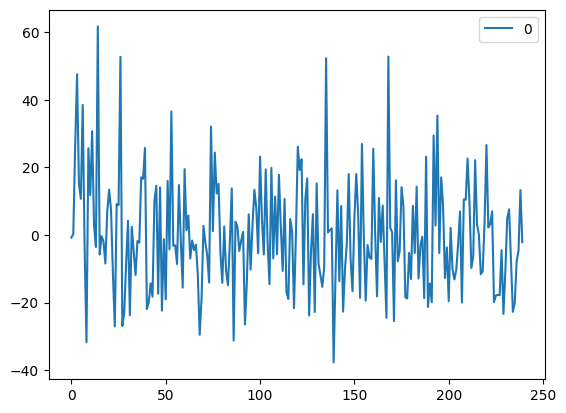

In [66]:
residuals = pd.DataFrame(fitted.resid)
residuals.plot()

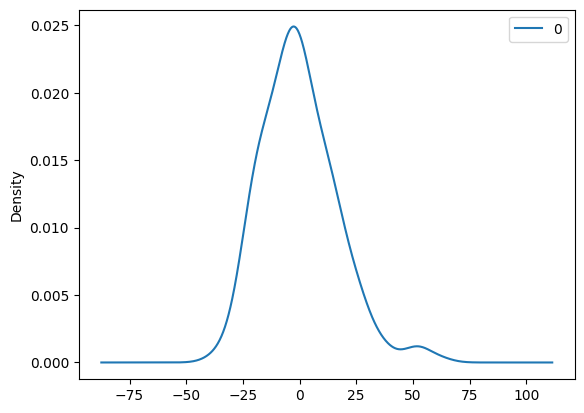

                0
count  240.000000
mean    -0.081290
std     16.604566
min    -37.709417
25%    -11.697988
50%     -1.850883
75%      9.810922
max     61.734227


In [67]:
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [68]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(train, order=(10,0,0))
 model_fit = model.fit()
 output = model_fit.forecast(dynamic=False)
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 train.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

AttributeError: ignored

Test RMSE: 26.479


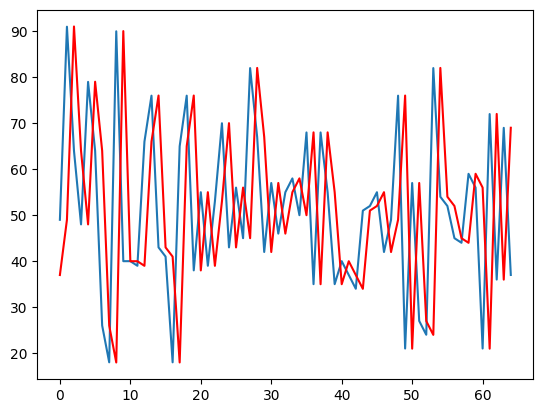

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()